<a href="https://colab.research.google.com/github/ShafeenaFarheen/Data-Analysis-and-Visuaization-mini-project-2/blob/main/chennai_houses_sales_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://live.staticflickr.com/7448/16410305501_45bdceb314_b.jpg" width="85%:">

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

In [ ]:
# Reading csv file
df=pd.read_csv("Chennai houseing sale.csv")
# Lets view what is in the Data
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
# Size of the data 
df.shape

(7109, 22)

In [ ]:
# Checking for Null Values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
# Replacing the Null Values with mean values of the data using Simple Imputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df['N_BEDROOM']=imputer.fit_transform(df[['N_BEDROOM']])
df['N_BATHROOM']=imputer.fit_transform(df[['N_BATHROOM']])
df['QS_OVERALL']=imputer.fit_transform(df[['QS_OVERALL']])

In [ ]:
# lets see the unique values of columns
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [ ]:
# Cleaning the Data 
df.AREA.replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df.AREA.replace('Karapakkam','Karapakam',inplace=True)
df.AREA.replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet',inplace=True)
df.AREA.replace('KKNagar','KK Nagar',inplace=True)
df.AREA.replace('TNagar','T Nagar',inplace=True)
df.AREA.replace('Adyr','Adyar',inplace=True)
df.AREA.replace('Velchery','Velachery',inplace=True)
df.BUILDTYPE.replace('Comercial','Commercial',inplace=True)
df.BUILDTYPE.replace('Other','Others',inplace=True)
df.UTILITY_AVAIL.replace('AllPub','All Pub',inplace=True)
df.UTILITY_AVAIL.replace('NoSewr','NoSeWa',inplace=True)
df.UTILITY_AVAIL.replace('NoSewr ','NoSeWa',inplace=True)
df.SALE_COND.replace('Ab Normal','AbNormal',inplace=True)
df.SALE_COND.replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df.SALE_COND.replace('Adj Land','AdjLand',inplace=True)
df.PARK_FACIL.replace('Noo','No',inplace=True)
df.STREET.replace('Pavd','Paved',inplace=True)
df.STREET.replace('NoAccess','No Access',inplace=True)

In [ ]:
#Changing the datatype from float to int
df.QS_ROOMS=df.QS_ROOMS.astype(int)
df.QS_BATHROOM=df.QS_BATHROOM.astype(int)
df.QS_BEDROOM=df.QS_BEDROOM.astype(int)
df.N_BEDROOM=df.N_BEDROOM.astype(int)
df.N_BATHROOM=df.N_BATHROOM.astype(int)

In [ ]:
df.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,All Pub,Paved,A,4,3,4,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,All Pub,Gravel,RH,4,4,2,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4,3,2,3.090,421094,92114,13159200


In [ ]:
# Stastical Description of Data
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.075538,3.069349,3.056126,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.872937,0.876024,0.871499,0.525440,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df.AREA.value_counts()

Chrompet      1702
Karapakam     1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

#### Count of Houses in different Areas in Chennai

* Chrompet Area Has Maximum Houses When Compared to Others
* T Nagar Area Has Less Houses in Chennai

In [ ]:
px.pie(df.groupby('AREA',as_index=False)['PRT_ID'].count(),values='PRT_ID',names='AREA',labels={'PRT_ID':'Count'},template='plotly_dark',color_discrete_sequence=px.colors.sequential.Plasma,hole=.5,title='<b> Houses Count in different Areas of Chennai</b>')

#### How the Sales Price of Houses varies with Different Areas in Chennai ?

* T Nagar and Anna Nagar Area Houses Has Maximum Sales Price and KK Nagar Area Houses are second Max Sales Price
* Karapakam Area Houses has Less Sales Price When Compared to other Area Houses

In [ ]:
px.box(df,x='AREA',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b> Sales Price of Houses in different Areas')

#### How the Square Foot of the House will Effect the  Sales Price?
* Increase in Square Foot of Houses increases the Sales price of Houses
* As we can see the Houses Related to Same Area  Having Almost Similar Square feet Length
* T Nagar and Anna Nagar Area Houses has Maximum Price Having Square Foot in the Range of 1500 to 2000
* KK Nagar Area Houses Has high Square foots from 1400 to 2500

In [ ]:
px.scatter(df,x='INT_SQFT',y='SALES_PRICE',color='AREA',size='INT_SQFT',labels={'INT_SQFT':'SQFT'},template='plotly_dark',title='<b> SQFT Versus SALES PRICE of Houses in Different Areas')

#### How does Sales Price Depends on the Main Road Distance From the House? 
* It Seems Like MainRoad Distance Does Not Affecting the Sales Price of Houses
* The Price is same for the Houses having shorter Main Road Distance and Larger Main Road Distance
* So the Main Road Distance is Not influencing More on Sales Price

In [ ]:
px.scatter(df,x='DIST_MAINROAD',y='SALES_PRICE',color='AREA',size='SALES_PRICE',template='plotly_dark',title='<b> MAINROAD DISTANCE Vs SALES_PRICE')

#### How the Sales Price Depends On the Build Date and Sale Date of Houses ?

In [ ]:
fig=px.scatter(df,x='DATE_BUILD',y='SALES_PRICE',color='AREA',size='SALES_PRICE',template='plotly_dark',title='<b> Build Date Vs Sales Price')
fig.show()
fig=px.scatter(df,x='DATE_SALE',y='SALES_PRICE',color='AREA',size='SALES_PRICE',template='plotly_dark',title='<b> Sale Date Vs Sales Price')
fig.show()

#### How the Sales Price Depends On Number of Rooms ?

* As we can see increase in Rooms Count increases the Sales Price of Houses
* Houses having total Four and Five Rooms in the areas of Anna Nagar,Velacherry,KK Nagar and T Nagar Has Maximum Sales Price 
* Karapakam,Adyar and Chrompet Area Houses having Two to Four Rooms but four room houses has maximum sales price when compared to others
* Anna Nagar,Velacherry and T Nagar Areas consists of Four to Five Room Houses
* KK Nagar Area Houses consists of Two to six Rooms and the price incresases with increase in the Room Count

In [ ]:
px.box(df,x='N_ROOM',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Total Rooms Versus Sales Price of Houses in Different Areas')

#### How the Sales Price Depends On Number of Bed Rooms ?

* Increase in Bed Rooms Increases the Sales Price
* Anna Nagar,T Nagar,Adyar,Karapakam and Chrompet Area Houses consists of one to two bedrooms but two bedroom houses has maximum sales price in these areas
* KK Nagar Area Consists of Houses having one to four bedrooms and Sales price increases with increase in bedrooms
* Velacherry Area Houses Consists of two to three Bedrooms
* Out of all Anna Nagar and T Nagar Area Houses with two Bedrooms has Maximum Sales Price

In [ ]:
px.box(df,x='N_BEDROOM',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Total BedRooms Versus Sales Price of Houses in Different Areas')

#### How the Sales Price Depends On the Number of Bath Rooms ?

* Increase in Bathrooms Increases the Sales Price in all Areas
* Anna Nagar and T Nagar Area houses Having only one Bathroom Has Maximum Sales Price when Compared to other Areas

In [ ]:
px.box(df,x='N_BATHROOM',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Total BathRooms Versus Sales Price of Houses in Different Areas')

#### How the Sales Price Depends On the Sale Condion of the Houses?

* Sales Price is Maximum for Normal, Family and AbNormal conditions of Sale

In [ ]:
px.box(df,x='SALE_COND',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Sale Condition Versus Sales Price of Houses in Different Areas')

#### How the Sales Price Depends On the Parking Facility of the Houses?

* Sales Price is Maximum for the Houses having Parking Facility in Different Areas

In [ ]:
px.box(df,x='PARK_FACIL',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Parking Facility Versus Sales Price of Houses in Different Areas')

#### How the Sales Price Depends On the Build Type of the Houses?

* Sales Price is Maximum for the Houses having Commercial Build Type in Different Areas

In [ ]:
px.box(df,x='BUILDTYPE',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b>Build Type Versus Sales Price of Houses in Different Areas')

#### How the Sales Price Depends On the Street Type of the Houses?

* Sales Price is almost equal for all the Houses Having different Streets in different Areas

In [ ]:
px.box(df,x='STREET',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b> Street Versus Sales Price of Houses in Different Areas')

In [ ]:
df.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.016146,-0.011463,0.005847,0.013989,0.657544,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.013050,-0.021857,0.002757,-0.017255,0.011600,0.010994,0.018783
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.011434,-0.008603,0.014449,0.014245,0.455380,0.430446,0.330987
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.010452,-0.011005,0.013390,0.007961,0.260244,0.256726,0.108834
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.013468,-0.009066,0.012072,0.015418,0.630932,0.533343,0.602760
QS_ROOMS,0.016146,0.013050,0.011434,0.010452,0.013468,1.000000,0.001796,0.009590,0.489271,0.014614,0.007072,0.016059
QS_BATHROOM,-0.011463,-0.021857,-0.008603,-0.011005,-0.009066,0.001796,1.000000,-0.011917,0.513585,-0.014777,-0.008397,-0.019469
QS_BEDROOM,0.005847,0.002757,0.014449,0.013390,0.012072,0.009590,-0.011917,1.000000,0.598154,0.018875,0.019376,0.015044
QS_OVERALL,0.013989,-0.017255,0.014245,0.007961,0.015418,0.489271,0.513585,0.598154,1.000000,0.022410,0.016946,0.020485
REG_FEE,0.657544,0.011600,0.455380,0.260244,0.630932,0.014614,-0.014777,0.018875,0.022410,1.000000,0.659903,0.878148


#### Pairwise Correlation of All Columns in the Data

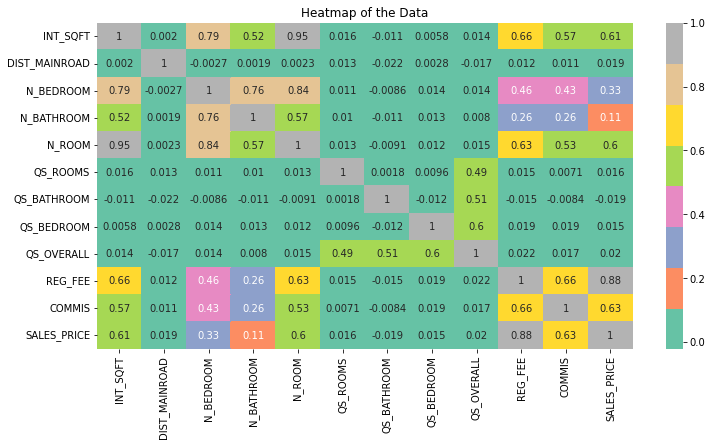

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Set2')
plt.title('Heatmap of the Data')
plt.show()

In [ ]:
# Creating a Back up File
df_bk=df.copy()

In [ ]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,2266,4,1004,310,131,1,1,3,0,1,2731,0,0,2,0,4,3,4,4.330,380000,144400,7600000
1,6664,1,1986,1745,26,2,1,5,0,0,4226,0,0,0,3,4,4,2,3.765,760122,304049,21717770
2,1270,0,909,288,70,1,1,3,0,1,1511,0,1,0,4,4,3,2,3.090,421094,92114,13159200
3,3755,6,1855,1117,14,3,2,5,2,0,3300,2,2,2,2,4,3,3,4.010,356321,77042,9630290
4,4393,4,1226,442,84,1,1,3,0,1,2406,2,0,0,1,3,2,4,3.290,237000,74063,7406250


In [ ]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [ ]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4976, 21), (2133, 21), (4976,), (2133,))

In [ ]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 1045206.852
Mean Squared Error (MSE): 1725342669531.458
Root Mean Squared Error (RMSE): 1313522.999
R2_score: 0.872777
Root Mean Squared Log Error (RMSLE): 14.088
Mean Absolute Percentage Error (MAPE): 10.26 %
Adj R Square:  0.8724
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 813954.82
Mean Squared Error (MSE): 1120285963064.112
Root Mean Squared Error (RMSE): 1058435.621
R2_score: 0.917392
Root Mean Squared Log Error (RMSLE): 13.872
Mean Absolute Percentage Error (MAPE): 8.26 %
Adj R Square:  0.917147
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 597448.683
Mean Squared Error (MSE): 559890364964.814
Root Mean Squared Error (RMSE): 748258.221
R2_score: 0.958715
Root Mean Square

In [ ]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),1.045207e+06,0.872400,1.313523e+06,10.259449,1.725343e+12,14.088223,0.872777
1,DecisionTreeRegressor(),8.139548e+05,0.917147,1.058436e+06,8.263625,1.120286e+12,13.872303,0.917392
2,"(DecisionTreeRegressor(max_features='auto', ra...",5.974487e+05,0.958593,7.482582e+05,6.070106,5.598904e+11,13.525503,0.958715
3,KNeighborsRegressor(),1.289243e+06,0.781668,1.718185e+06,12.362582,2.952160e+12,14.356779,0.782313
4,"(ExtraTreeRegressor(random_state=1831028191), ...",3.880783e+05,0.982262,4.897441e+05,3.998625,2.398493e+11,13.101638,0.982314
5,([DecisionTreeRegressor(criterion='friedman_ms...,5.761153e+05,0.959140,7.432910e+05,5.591655,5.524815e+11,13.518843,0.959261
6,XGBRegressor(),5.561106e+05,0.962454,7.125106e+05,5.402877,5.076714e+11,13.476550,0.962565


#### From the above Results, the Top 3 Models by Comparing Adjacent R Square Values are

1. <b>ExtraTreesRegressor</b>         
2. <b>XGBRegressor</b>               
3. <b>GradientBoostingRegressor</b> 

* Training and Predicting with <b>ExtraTreesRegressor</b>

In [ ]:
# Training the Model

modelETR.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelXGR.predict(x_test)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [ ]:
result[['PRT_ID','AREA','Price_actual','Price_pred']].sample(20)

,PRT_ID,AREA,Price_actual,Price_pred
486,P05251,Chrompet,10613930,10527870.0
7021,P08270,KK Nagar,14119360,15341576.0
7079,P01918,Adyar,8017445,8134516.0
5710,P00777,Anna Nagar,12256520,12596124.0
4962,P09671,Velachery,8439410,9582418.0
3513,P01017,Chrompet,11074760,10791970.0
5346,P02117,Anna Nagar,22619470,21694772.0
65,P01247,Anna Nagar,11920820,10791918.0
6039,P07997,KK Nagar,16129140,16513766.0
1224,P08593,T Nagar,17673370,15457218.0


In [ ]:
px.scatter(result,x='Price_actual',y='Price_pred',trendline='ols',template='plotly_dark',title='<b> Actual Price  Vs  Predicted Price ')